--2020-12-02 23:37:09--  https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg [following]
--2020-12-02 23:37:09--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg.3’

Marquette.jpg.3     100%[===================>] 471.02K  --.-KB/s    in 0.04s   

2020-12-02 23:37:10 (10.6 MB/s) - ‘Marquette.jpg.3’ saved [482326/482326]



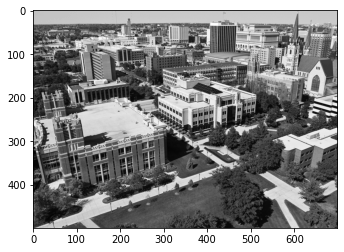

In [4]:
import cv2
import scipy
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
!wget 'https://github.com/Henry-Medeiros/images/raw/master/Marquette.jpg'
img = cv2.imread('Marquette.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,'gray')

In [12]:
def plotMagnitude(fft_img):
  mag_img = abs(fft_img)
  mag_img = np.log(mag_img + 1e-7)
  #normalized
  max_img = np.max(mag_img).astype(float)
  mag_img = (mag_img /max_img*255.0).astype(int)

  plt.imshow(mag_img, 'gray')
  plt.show()


Ideal High Pass filter:

background ( low frequency ) becomes zero
keep high frequency parts which is edges!

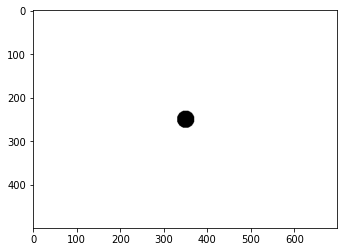

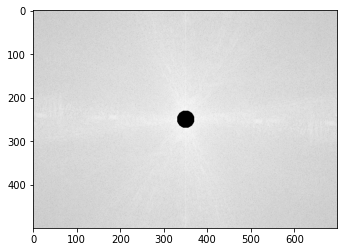

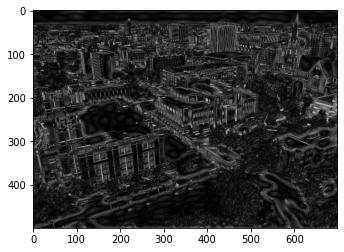

In [14]:
# ideal High pass filter:
# use meshgrid to produce filter d(u,v)
dims = img.shape
d0 = 20
# make filter with same size as image
x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

# print('xv',xv)
# print('yv',yv)

# find euledian distance
# ilpf_mask = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) <d0
#or
duv = ((xv - dims[1]/2)**2 +  (yv-dims[0]/2)**2)**0.5

ilpf_mask = duv >= d0

plt.imshow(255*ilpf_mask,'gray')
plt.plot()


plt.imshow(255*ilpf_mask, 'gray')
plt.show()


img_fft = np.fft.fft2(img)

filt_fft_img = np.fft.fftshift(img_fft)*ilpf_mask

plotMagnitude(filt_fft_img)


#reconstract image:
Img_rec = abs(np.fft.ifft2(filt_fft_img))
plt.imshow(Img_rec,'gray')

 Solve ringing effect ==> butterworth high pass filter

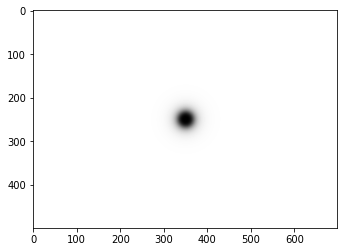

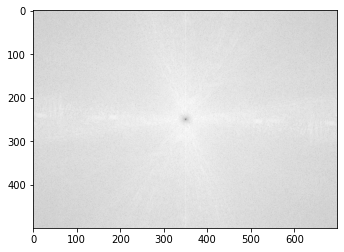

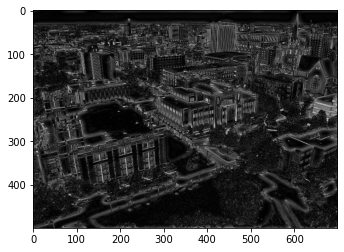

In [19]:
dims = img.shape
d0 = 20
n =2
x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

duv = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) 

mask_bw = 1.0/(1.0+(d0/(duv+ 1e-10))**(2**n)) #1e-10 is added for places duv =0

plt.imshow(255*mask_bw,'gray')
plt.plot()
plt.show()

img_fft = np.fft.fft2(img)

filt_fft_img2 = np.fft.fftshift(img_fft) * mask_bw

plotMagnitude(filt_fft_img2)


#reconstract image:
Img_rec = abs(np.fft.ifft2(filt_fft_img2))
plt.imshow(Img_rec,'gray')

increase denote for the HPF, black rigion larger ==> more cutoff ==> only sharpper image 

Gaussian high pass filter

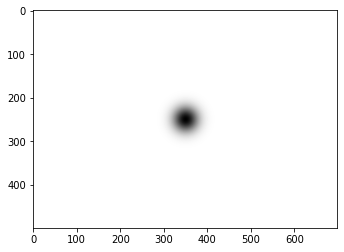

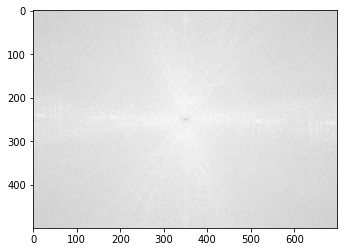

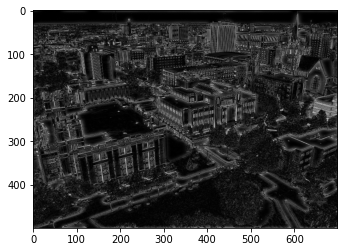

In [21]:
dims = img.shape
d0 = 20
n =20
x= range(dims[1])
y = range(dims[0])

xv, yv = np.meshgrid(x,y)

duv = np.linalg.norm([xv - dims[1]/2, yv-dims[0]/2 ], axis=0) 


mask_gauss = 1.0 - np.exp(-(duv**2)/(2*d0**2))

plt.imshow(255*mask_gauss,'gray')
plt.plot()
plt.show()

img_fft = np.fft.fft2(img)

filt_fft_img2 = np.fft.fftshift(img_fft) * mask_gauss

plotMagnitude(filt_fft_img2)


#reconstract image:
Img_rec = abs(np.fft.ifft2(filt_fft_img2))
plt.imshow(Img_rec,'gray')

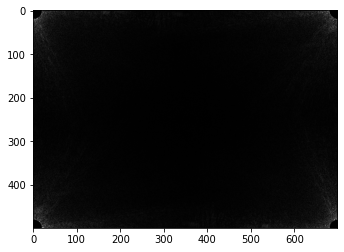

In [ ]:
import scipy.fftpack as fftim
c = fftim.fft2(img)
img_fft = fftim.fftshift(c)
filt_fft_img = abs(np.fft.fftshift((img_fft)*mask_bw))
plt.imshow(filt_fft_img,'gray')